In [23]:
import pandas as pd
import numpy as np
import json
import os
from IPython.display import display

import scipy, scipy.io

import matplotlib
from matplotlib import *
from matplotlib import pyplot as plt
import itertools
from mpl_toolkits.axes_grid1 import make_axes_locatable
# pretty charting
import seaborn as sns
sns.set_palette('muted')
sns.set_style('darkgrid')
from natsort import natsorted, ns

%matplotlib inline

from operator import itemgetter

## sklearn imports
import sklearn.linear_model
import sklearn.cross_validation
import sklearn.tree
import sklearn.ensemble
import sklearn.preprocessing
import sklearn.feature_selection
import sklearn.pipeline
import sklearn.grid_search

In [2]:
def loadmat(filename):
    '''
    this function should be called instead of direct spio.loadmat
    as it cures the problem of not properly recovering python dictionaries
    from mat files. It calls the function check keys to cure all entries
    which are still mat-objects
    '''
    data = scipy.io.loadmat(filename, struct_as_record=False, squeeze_me=True)
    return _check_keys(data)

def _check_keys(dict):
    '''
    checks if entries in dictionary are mat-objects. If yes
    todict is called to change them to nested dictionaries
    '''
    for key in dict:
        if isinstance(dict[key], scipy.io.matlab.mio5_params.mat_struct):
            dict[key] = _todict(dict[key])
    return dict        

def _todict(matobj):
    '''
    A recursive function which constructs from matobjects nested dictionaries
    '''
    dict = {}
    for strg in matobj._fieldnames:
        elem = matobj.__dict__[strg]
        if isinstance(elem, scipy.io.matlab.mio5_params.mat_struct):
            dict[strg] = _todict(elem)
        elif isinstance(elem,np.ndarray):
            dict[strg] = _tolist(elem)
        else:
            dict[strg] = elem
    return dict

def _tolist(ndarray):
    '''
    A recursive function which constructs lists from cellarrays 
    (which are loaded as numpy ndarrays), recursing into the elements
    if they contain matobjects.
    '''
    elem_list = []            
    for sub_elem in ndarray:
        if isinstance(sub_elem, scipy.io.matlab.mio5_params.mat_struct):
            elem_list.append(_todict(sub_elem))
        elif isinstance(sub_elem,np.ndarray):
            elem_list.append(_tolist(sub_elem))
        else:
            elem_list.append(sub_elem)
    return elem_list

In [3]:
dataFile = '../Monkey X/clusters/pearsonRSpectralClustered_allconditions'
data = loadmat(dataFile)

In [9]:
indiceFile = '../Monkey X/clusters/cindices'
indices = loadmat(indiceFile)
indices = indices['clusters']
print "The indices for each neuron: ", indices

The indices for each neuron:  [3 3 3 1 3 3 3 3 3 1 3 3 3 3 3 1 4 3 3 2 3 3 2 3 3 3 3 3 3 1 3 1 3 3 4 4 3
 3 3 3 3 1 3 3 2 3 3 3 1 3 3 2 2 3 3 3 3 2 3 1 3 3 3 3 3 3 3 3 1 3 2 3 3 1
 3 3 3 1 3 3 1 3 1 3 3 3 3 3 3 3 4 3 3 3 3 3 3 3 3 3 4 3 3 3 3 1 2 3 3 3 3
 3 3 1 3 3 2 3 2 3 2 3 3 3 3 2 3 1 2 3 2 3 3 3 3 3 1 3 4 3 3 3 3 3 3 3 3 3
 1 3 3 3 3 2 3 3 4 3 3 3 3 3 3 3 3 3 3]


In [13]:
# get the neuron names in order
binNeuronDir = '../Monkey X/binned neurons 1ms/'
fileNames = []
for file in os.listdir(binNeuronDir):
    fileNames.append(file[0:len(file)-4])
print fileNames


['sig001a', 'sig001b', 'sig001c', 'sig003a', 'sig003b', 'sig003c', 'sig004a', 'sig004b', 'sig004c', 'sig004d', 'sig005a', 'sig005b', 'sig005c', 'sig005d', 'sig006a', 'sig006b', 'sig006c', 'sig007a', 'sig007b', 'sig007c', 'sig007d', 'sig008a', 'sig008b', 'sig008c', 'sig008d', 'sig009a', 'sig009b', 'sig010a', 'sig010b', 'sig011a', 'sig011b', 'sig012a', 'sig012b', 'sig014a', 'sig014b', 'sig014c', 'sig014d', 'sig015a', 'sig015b', 'sig020a', 'sig021a', 'sig021b', 'sig022a', 'sig022b', 'sig025a', 'sig027a', 'sig028a', 'sig033a', 'sig033b', 'sig033c', 'sig033d', 'sig034a', 'sig034b', 'sig034c', 'sig034d', 'sig035a', 'sig035b', 'sig036a', 'sig036b', 'sig036c', 'sig036d', 'sig037a', 'sig037b', 'sig037c', 'sig038a', 'sig038b', 'sig038c', 'sig038d', 'sig039a', 'sig039b', 'sig039c', 'sig040a', 'sig040b', 'sig041a', 'sig041b', 'sig041c', 'sig041d', 'sig042a', 'sig042b', 'sig043a', 'sig043b', 'sig046a', 'sig046b', 'sig046c', 'sig047a', 'sig047b', 'sig047c', 'sig047d', 'sig051a', 'sig052a', 'sig052b'

# analyze cluster 1

In [28]:
cluster_indices = [i for i,x in enumerate(indices) if x == 1]
print cluster_indices

cluster_neurons = []
for index in cluster_indices: # loop through each index
    cluster_neurons.append(fileNames[index])
    
print cluster_neurons

[3, 9, 15, 29, 31, 41, 48, 59, 68, 73, 77, 80, 82, 105, 113, 127, 136, 148]
['sig003a', 'sig004d', 'sig006b', 'sig011a', 'sig012a', 'sig021b', 'sig033b', 'sig036c', 'sig039a', 'sig041a', 'sig042a', 'sig043b', 'sig046b', 'sig075a', 'sig089b', 'sig097b', 'sig105a', 'sig115a']


sig007c
['info', 'spikeHist', 'trialnum']
sig008b
['info', 'spikeHist', 'trialnum']
sig025a
['info', 'spikeHist', 'trialnum']
sig034a
['info', 'spikeHist', 'trialnum']
sig034b
['info', 'spikeHist', 'trialnum']
sig036a
['info', 'spikeHist', 'trialnum']
sig039c
['info', 'spikeHist', 'trialnum']
sig078a
['info', 'spikeHist', 'trialnum']
sig092a
['info', 'spikeHist', 'trialnum']
sig094a
['info', 'spikeHist', 'trialnum']
sig094c
['info', 'spikeHist', 'trialnum']
sig096d
['info', 'spikeHist', 'trialnum']
sig097c
['info', 'spikeHist', 'trialnum']
sig098b
['info', 'spikeHist', 'trialnum']
sig117c
['info', 'spikeHist', 'trialnum']


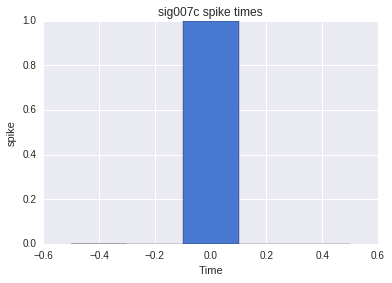

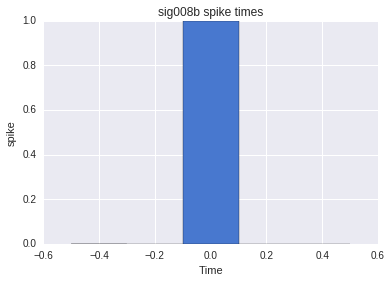

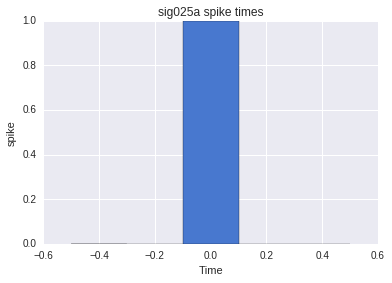

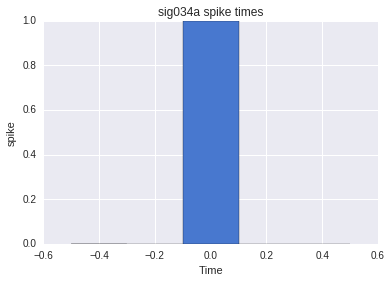

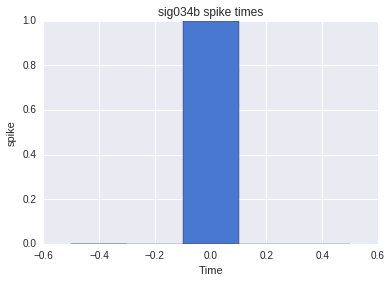

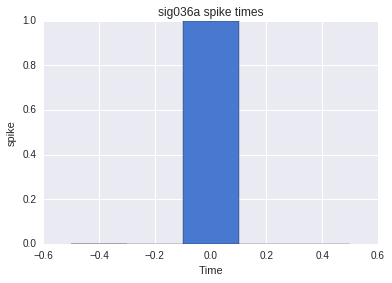

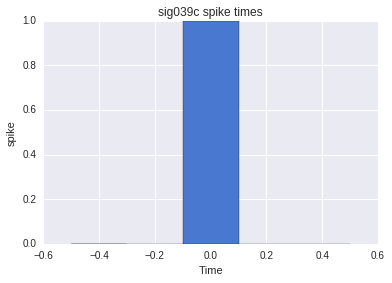

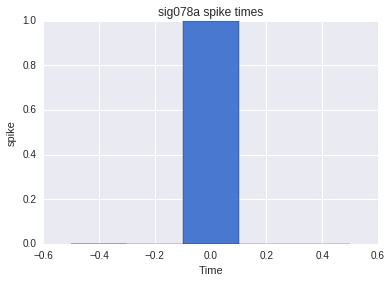

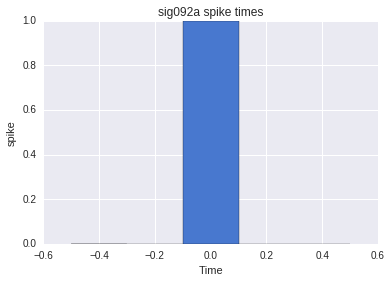

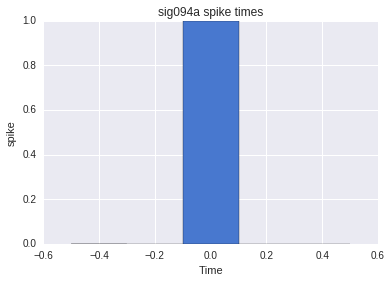

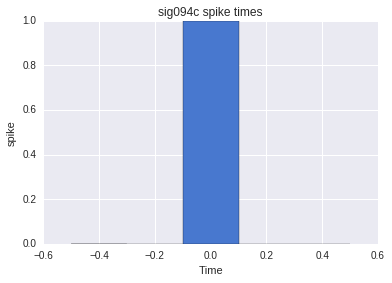

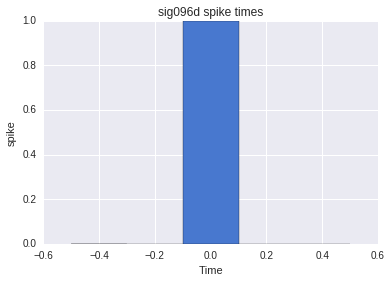

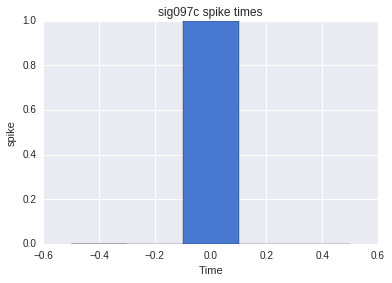

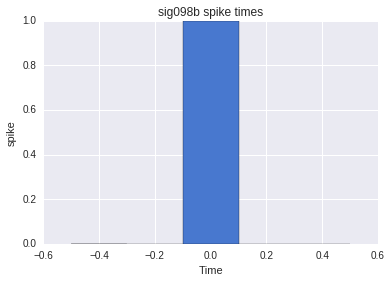

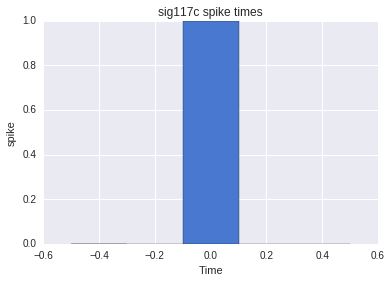

In [45]:
for neuron in cluster_neurons:
    print neuron
    data = loadmat(os.path.join(binNeuronDir, neuron))
    binned_neuron = data['binned_neuron']
    push = binned_neuron['push']
    trials = push.keys()
    
    # just look at 1 trial
    extrial = push['trial1']
    spikes = extrial['spikeHist']
    print extrial.keys()
    fig = plt.figure()
    plt.hist(spikes[spikes != 0], bins=5)
    plt.title(neuron + ' spike times')
    plt.xlabel('Time')
    plt.ylabel('spike')
#     print push.keys()
    
#     break

In [44]:
print extrial['spikeHist']


[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

[19, 22, 44, 51, 52, 57, 70, 106, 116, 118, 120, 125, 128, 130, 153]
['sig007c', 'sig008b', 'sig025a', 'sig034a', 'sig034b', 'sig036a', 'sig039c', 'sig078a', 'sig092a', 'sig094a', 'sig094c', 'sig096d', 'sig097c', 'sig098b', 'sig117c']
sig007c
['info', 'spikeHist', 'trialnum']
sig008b
['info', 'spikeHist', 'trialnum']
sig025a
['info', 'spikeHist', 'trialnum']
sig034a
['info', 'spikeHist', 'trialnum']
sig034b
['info', 'spikeHist', 'trialnum']
sig036a
['info', 'spikeHist', 'trialnum']
sig039c
['info', 'spikeHist', 'trialnum']
sig078a
['info', 'spikeHist', 'trialnum']
sig092a
['info', 'spikeHist', 'trialnum']
sig094a
['info', 'spikeHist', 'trialnum']
sig094c
['info', 'spikeHist', 'trialnum']
sig096d
['info', 'spikeHist', 'trialnum']
sig097c
['info', 'spikeHist', 'trialnum']
sig098b
['info', 'spikeHist', 'trialnum']
sig117c
['info', 'spikeHist', 'trialnum']


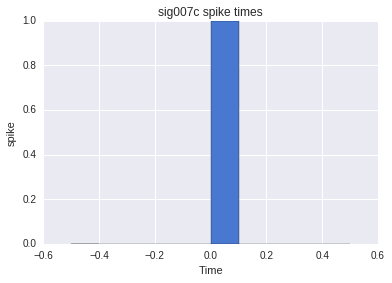

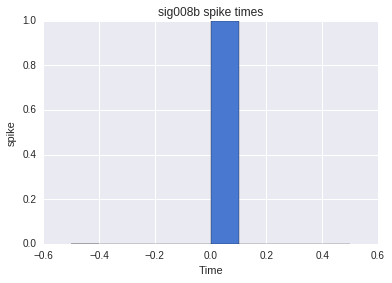

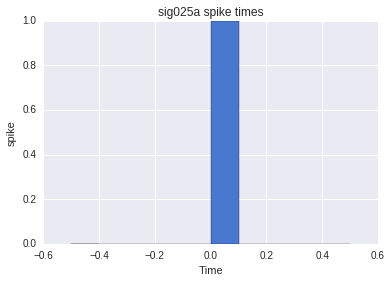

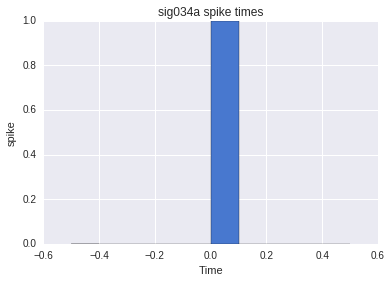

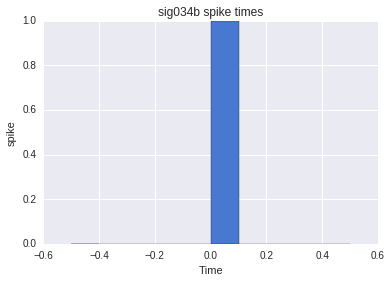

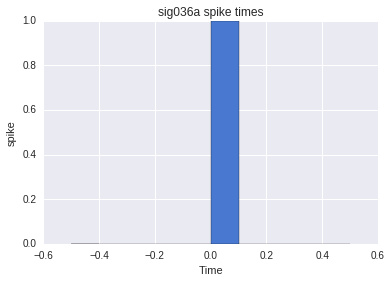

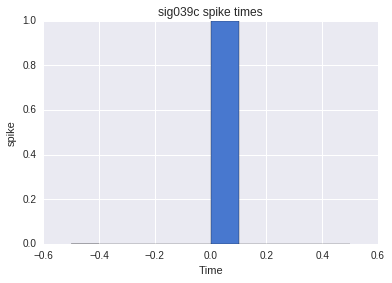

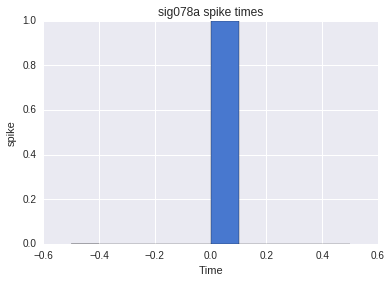

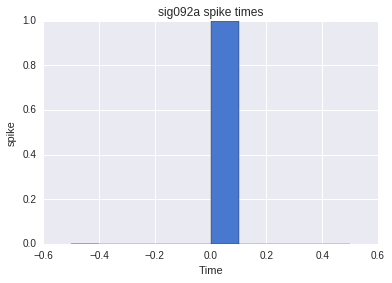

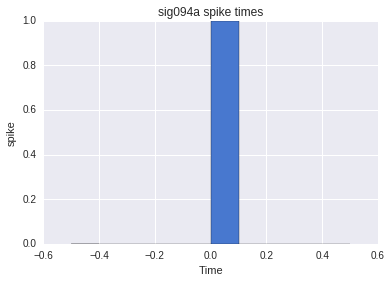

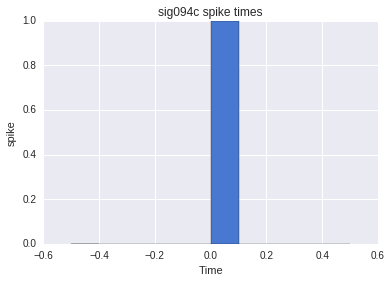

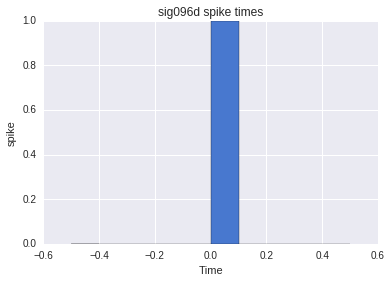

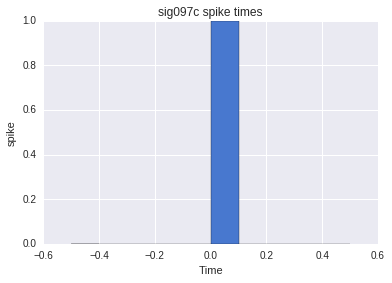

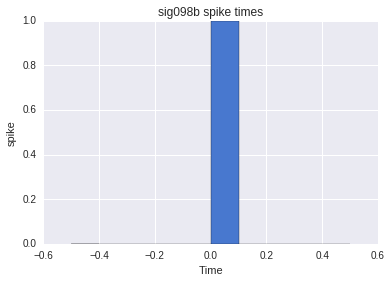

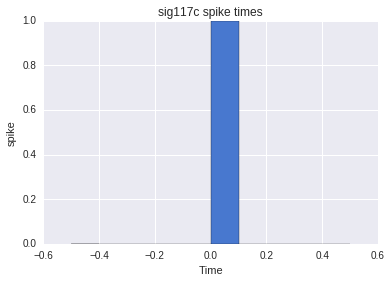

In [48]:
cluster_indices = [i for i,x in enumerate(indices) if x == 2]
print cluster_indices

cluster_neurons = []
for index in cluster_indices: # loop through each index
    cluster_neurons.append(fileNames[index])
    
print cluster_neurons

for neuron in cluster_neurons:
    print neuron
    data = loadmat(os.path.join(binNeuronDir, neuron))
    binned_neuron = data['binned_neuron']
    push = binned_neuron['push']
    trials = push.keys()
    
    # just look at 1 trial
    extrial = push['trial1']
    spikes = extrial['spikeHist']
    print extrial.keys()
    fig = plt.figure()
    plt.hist(spikes[spikes != 0])
    plt.title(neuron + ' spike times')
    plt.xlabel('Time')
    plt.ylabel('spike')